In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [11]:
import numpy as np

class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50): 
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [12]:
iris = datasets.load_iris()
X = iris.data[50:150, 0:2]
y = iris.target[50:150]

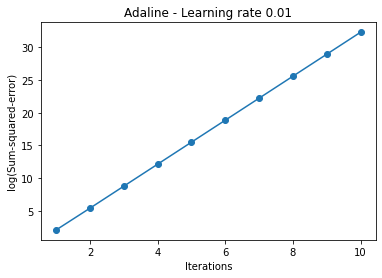

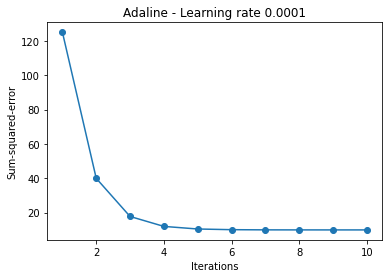

In [13]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

In [14]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


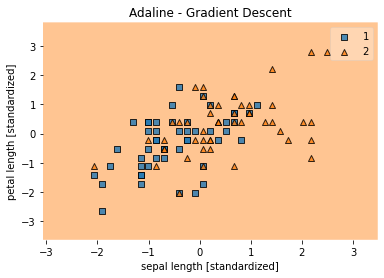

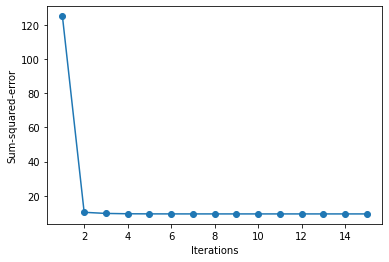

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()